In [1]:
%%time
from itertools import product 
import re
import pandas as pd
import numpy as np
import datetime
import gc
gc.set_threshold(100,1,1)
print(gc.get_threshold())
import matplotlib.pyplot as plt
plt.ion()
pd.set_option('display.max_columns',100)
from tqdm import tqdm

(100, 1, 1)
CPU times: user 472 ms, sys: 122 ms, total: 594 ms
Wall time: 913 ms


In [169]:
def quant(a, p=0.05):
    try:
        ar = np.sort(a)
        start = int(np.ceil(len(ar)*p))
        end = int(np.floor(len(ar)*(1-p)))
        ar = ar[start:end]
        return np.mean(ar)#, np.median(ar)#, np.median(ar), np.std(ar)#np.mean(ar)#len(a), len(ar), np.mean(ar), np.min(ar), np.max(ar), np.median(ar), np.std(ar)
    except:
        return 'Error'

In [170]:
data0 = pd.read_csv('InternationalDeclarations.csv')

In [171]:
#data0['concept:name'].value_counts()

In [172]:
data0.shape

(72151, 23)

In [173]:
data0.nunique()

id                                  69073
org:resource                            2
concept:name                           34
time:timestamp                      51270
org:role                                8
case:Permit travel permit number     5596
case:DeclarationNumber               6190
case:Amount                          6100
case:RequestedAmount                 6100
case:Permit TaskNumber                  6
case:Permit BudgetNumber              207
case:OriginalAmount                  6100
case:Permit ProjectNumber             825
case:concept:name                    6449
case:Permit OrganizationalEntity       27
case:travel permit number            6033
case:Permit RequestedBudget          5259
case:id                              6449
case:Permit ID                       6028
case:Permit id                       5608
case:BudgetNumber                     719
case:Permit ActivityNumber            145
case:AdjustedAmount                  6101
dtype: int64

In [174]:
data0.groupby('case:DeclarationNumber')['case:Permit BudgetNumber'].nunique().value_counts()

1     6189
86       1
Name: case:Permit BudgetNumber, dtype: int64

In [175]:
#data0[data0['case:DeclarationNumber'] == 'declaration number 76458']

In [176]:
data0['time:timestamp']=data0['time:timestamp'].astype(str).str[0:19]

In [177]:
data0[['case:DeclarationNumber', 'time:timestamp', 'concept:name']].to_excel('PM.xlsx', index=False)

In [178]:
data0[data0['concept:name'] == 'Start trip'].head()

,id,org:resource,concept:name,time:timestamp,org:role,case:Permit travel permit number,case:DeclarationNumber,case:Amount,case:RequestedAmount,case:Permit TaskNumber,case:Permit BudgetNumber,case:OriginalAmount,case:Permit ProjectNumber,case:concept:name,case:Permit OrganizationalEntity,case:travel permit number,case:Permit RequestedBudget,case:id,case:Permit ID,case:Permit id,case:BudgetNumber,case:Permit ActivityNumber,case:AdjustedAmount
0,rv_travel permit 76455_6,STAFF MEMBER,Start trip,2016-10-05 00:00:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,UNKNOWN,budget 922,39.664561,UNKNOWN,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
8,rv_travel permit 76665_6,STAFF MEMBER,Start trip,2016-11-21 00:00:00,EMPLOYEE,travel permit number 76666,declaration number 76668,346.544903,346.544903,task 427,budget 1644,346.544903,project 73472,declaration 76667,organizational unit 65458,travel permit number 76666,795.537307,declaration 76667,travel permit 76665,travel permit 76665,budget 144054,UNKNOWN,346.544903
16,rv_travel permit 73652_6,STAFF MEMBER,Start trip,2016-12-08 00:00:00,EMPLOYEE,travel permit number 73653,declaration number 73655,56.972769,56.972769,UNKNOWN,budget 6198,56.972769,UNKNOWN,declaration 73654,organizational unit 65455,travel permit number 73653,51.793426,declaration 73654,travel permit 73652,travel permit 73652,budget 143677,UNKNOWN,56.972769
24,rv_travel permit 73562_6,STAFF MEMBER,Start trip,2017-01-01 00:00:00,EMPLOYEE,travel permit number 73563,declaration number 73597,15.482037,15.482037,task 427,budget 899,15.482037,project 8761,declaration 73596,organizational unit 65455,travel permit number 73563,6020.792331,declaration 73596,travel permit 73562,travel permit 73562,budget 143495,UNKNOWN,15.482037
34,rv_travel permit 73562_6,STAFF MEMBER,Start trip,2017-01-01 00:00:00,EMPLOYEE,travel permit number 73563,declaration number 73595,131.597318,131.597318,task 427,budget 899,131.597318,project 8761,declaration 73594,organizational unit 65455,travel permit number 73563,6020.792331,declaration 73594,travel permit 73562,travel permit 73562,budget 143495,UNKNOWN,131.597318


In [179]:
data0['org:resource'].unique()

array(['STAFF MEMBER', 'SYSTEM'], dtype=object)

In [180]:
data0['org:role'].unique()

array(['EMPLOYEE', 'SUPERVISOR', 'UNDEFINED', 'DIRECTOR', 'PRE_APPROVER',
       'ADMINISTRATION', 'MISSING', 'BUDGET OWNER'], dtype=object)

In [183]:
data=data0[['case:DeclarationNumber', 'time:timestamp', 'concept:name', 'case:Permit RequestedBudget', 'case:OriginalAmount']]

In [143]:
data[data['case:DeclarationNumber']!='UNKNOWN'].head(5)

,case:DeclarationNumber,time:timestamp,concept:name,case:Permit RequestedBudget,case:OriginalAmount
0,declaration number 76458,2016-10-05 00:00:00,Start trip,41.613445,39.664561
1,declaration number 76458,2016-10-05 00:00:00,End trip,41.613445,39.664561
2,declaration number 76458,2017-04-06 13:32:10,Permit SUBMITTED by EMPLOYEE,41.613445,39.664561
3,declaration number 76458,2017-04-06 13:32:28,Permit FINAL_APPROVED by SUPERVISOR,41.613445,39.664561
4,declaration number 76458,2017-04-07 13:38:14,Declaration SUBMITTED by EMPLOYEE,41.613445,39.664561


In [185]:
data['time:timestamp'] = pd.to_datetime(data['time:timestamp'], format='%Y-%m-%d %H:%M:%S')
data.sort_values(['case:DeclarationNumber', 'time:timestamp'], inplace = True)

data['Следующий шаг']= data.groupby('case:DeclarationNumber').shift(-1)['time:timestamp']
data['Шаг']= data['concept:name'].astype(str)+'-->'+data.groupby('case:DeclarationNumber').shift(-1)['concept:name'].astype(str)

#Используем для подсчета длительности
def delta(x):
    t0 = x.split('*^')[0]
    t1 = x.split('*^')[1]
    return((pd.to_datetime(t0) - pd.to_datetime(t1)).seconds)

data['Длительность_шага'] = data['Следующий шаг'].astype(str) + '*^' + data['time:timestamp'].astype(str)
data['Длительность_шага'] = data['Длительность_шага'].apply(delta)

<ipython-input-185-a6c8db0f9d90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time:timestamp'] = pd.to_datetime(data['time:timestamp'], format='%Y-%m-%d %H:%M:%S')
<ipython-input-185-a6c8db0f9d90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['case:DeclarationNumber', 'time:timestamp'], inplace = True)
<ipython-input-185-a6c8db0f9d90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [186]:
data['Длительность_шага']=data['Длительность_шага']/3600

<ipython-input-186-026c4fe8805d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Длительность_шага']=data['Длительность_шага']/3600


In [187]:
data['Шаг'].value_counts()[:10]

Request Payment-->Payment Handled                                                    6149
Declaration FINAL_APPROVED by SUPERVISOR-->Request Payment                           5918
Payment Handled-->nan                                                                5646
Start trip-->End trip                                                                5612
Declaration SUBMITTED by EMPLOYEE-->Declaration APPROVED by ADMINISTRATION           4950
Permit SUBMITTED by EMPLOYEE-->Permit APPROVED by ADMINISTRATION                     4798
End trip-->Declaration SUBMITTED by EMPLOYEE                                         4497
Permit FINAL_APPROVED by SUPERVISOR-->Start trip                                     4079
Declaration APPROVED by ADMINISTRATION-->Declaration FINAL_APPROVED by SUPERVISOR    2959
Permit APPROVED by ADMINISTRATION-->Permit FINAL_APPROVED by SUPERVISOR              2483
Name: Шаг, dtype: int64

In [188]:
# sp=['Request Payment-->Payment Handled', 'Declaration FINAL_APPROVED by SUPERVISOR-->Request Payment', \
#     'Payment Handled-->nan', 'Start trip-->End trip',\
#     'Declaration SUBMITTED by EMPLOYEE-->Declaration APPROVED by ADMINISTRATION',\
#    'Permit SUBMITTED by EMPLOYEE-->Permit APPROVED by ADMINISTRATION',\
#    'End trip-->Declaration SUBMITTED by EMPLOYEE',\
#    'Permit FINAL_APPROVED by SUPERVISOR-->Start trip', 
#    'Declaration APPROVED by ADMINISTRATION-->Declaration FINAL_APPROVED by SUPERVISOR',\
#    'Permit APPROVED by ADMINISTRATION-->Permit FINAL_APPROVED by SUPERVISOR']
# data[data['Шаг'].isin(sp)]

In [189]:
data['diff']=data['case:Permit RequestedBudget']-data['case:OriginalAmount']

<ipython-input-189-d01387e7259c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diff']=data['case:Permit RequestedBudget']-data['case:OriginalAmount']


In [190]:
#data['Переход']= data.groupby('case:DeclarationNumber').shift(-3)['concept:name'].astype(str)

In [191]:
info1=data.groupby(['case:DeclarationNumber', 'diff', 'case:OriginalAmount'])\
.agg({'Длительность_шага' : 'sum', 'Шаг' : 'count', 'concept:name' : 'last', 'time:timestamp': 'max'}).reset_index()

In [199]:
info1

,case:DeclarationNumber,diff,case:OriginalAmount,Длительность_шага,Шаг,concept:name,time:timestamp,Месяц
0,UNKNOWN,-189.898667,970.763668,66.012222,9,Declaration REJECTED by MISSING,2017-11-02 09:36:24,2017-11
1,UNKNOWN,0.000000,0.000000,360.308889,80,Declaration SAVED by EMPLOYEE,2018-12-20 13:38:18,2018-12
2,UNKNOWN,28.453204,435.475839,36.930556,8,Declaration REJECTED by MISSING,2017-10-13 12:56:57,2017-10
3,UNKNOWN,34.455037,0.000000,40.207778,7,Declaration SAVED by EMPLOYEE,2018-03-20 12:11:17,2018-03
4,UNKNOWN,34.787702,294.646603,93.652500,9,Declaration REJECTED by MISSING,2017-10-12 14:18:11,2017-10
...,...,...,...,...,...,...,...,...
6383,declaration number 9935,274.085803,588.130139,77.945278,10,Payment Handled,2018-04-12 17:31:11,2018-04
6384,declaration number 9946,-541.572797,966.108393,51.275833,10,Payment Handled,2018-04-09 17:30:58,2018-04
6385,declaration number 9956,-873.065881,1539.687646,79.767500,12,Payment Handled,2018-05-24 17:31:07,2018-05
6386,declaration number 9969,-89.468728,337.873587,113.516667,18,Payment Handled,2018-03-08 17:31:00,2018-03


In [198]:
info1['Месяц']=info1['time:timestamp'].astype(str).str[0:7]

In [202]:
info5=info1.groupby(['Месяц'])\
.agg({'case:DeclarationNumber' : 'count', 'case:OriginalAmount' : quant, 'Длительность_шага' : quant}).reset_index()
info5.to_excel('PM1.xlsx', index=False)

In [201]:
info4=info1.groupby(['concept:name', 'Шаг'])\
.agg({'diff' : quant, 'case:OriginalAmount' : quant}).reset_index()
info4.to_excel('PM1.xlsx', index=False)

In [200]:
info3=info1.groupby(['concept:name', 'Месяц'])\
.agg({'Длительность_шага' : quant, 'Шаг' : quant, 'diff' : quant, 'case:OriginalAmount' : quant}).reset_index()
info3.to_excel('PM1.xlsx', index=False)

/Users/a18860104/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/a18860104/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [196]:
info2=info1.groupby(['concept:name'])\
.agg({'Длительность_шага' : quant, 'Шаг' : quant, 'diff' : quant, 'case:OriginalAmount' : quant}).reset_index()
info2.to_excel('PM.xlsx', index=False)

<AxesSubplot:>

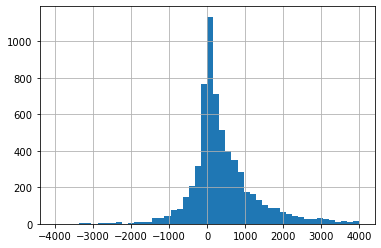

In [193]:
info1['diff'].hist(bins=50, range=(-4000, 4000))

In [207]:
info1[['concept:name', 'case:DeclarationNumber']].drop_duplicates()['concept:name'].value_counts(normalize=True).reset_index().to_excel('PM1.xlsx')

In [208]:
info=data[data['Шаг'].isin(sp)].groupby(['Шаг'])\
.agg({'Длительность_шага' : quant}).reset_index()
info.sort_values('Длительность_шага')[:20]

,Шаг,Длительность_шага
9,Start trip-->End trip,0.000000
7,Permit SUBMITTED by EMPLOYEE-->Permit APPROVED...,0.004596
2,Declaration SUBMITTED by EMPLOYEE-->Declaratio...,0.971098
8,Request Payment-->Payment Handled,6.167457
1,Declaration FINAL_APPROVED by SUPERVISOR-->Req...,10.010380
0,Declaration APPROVED by ADMINISTRATION-->Decla...,11.590939
5,Permit APPROVED by ADMINISTRATION-->Permit FIN...,11.649527
6,Permit FINAL_APPROVED by SUPERVISOR-->Start trip,12.413022
3,End trip-->Declaration SUBMITTED by EMPLOYEE,13.600276
4,Payment Handled-->nan,NaN


In [213]:
info=data.groupby(['Шаг'])\
.agg({'Длительность_шага' : quant, 'time:timestamp' : 'count', 'case:DeclarationNumber' : 'nunique'}).reset_index()
info['Длительность_шага']=info['Длительность_шага'].fillna(0.0)
info.sort_values('Длительность_шага')
info[info['Длительность_шага']!=0].to_excel('pp.xlsx')

/Users/a18860104/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/a18860104/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [216]:
info[info['Длительность_шага']!=0].head()

,Шаг,Длительность_шага,time:timestamp,case:DeclarationNumber,Зацикленность
0,Declaration APPROVED by ADMINISTRATION-->Decla...,10.733765,1811,1793,1.010039
1,Declaration APPROVED by ADMINISTRATION-->Decla...,10.753446,103,103,1.000000
2,Declaration APPROVED by ADMINISTRATION-->Decla...,11.590939,2959,2959,1.000000
4,Declaration APPROVED by ADMINISTRATION-->Decla...,9.861604,35,35,1.000000
5,Declaration APPROVED by ADMINISTRATION-->Decla...,0.503056,3,1,3.000000


In [215]:
info['Зацикленность']=info['time:timestamp']/info['case:DeclarationNumber']

In [221]:
info[(info['Зацикленность']>1.5)&(info['case:DeclarationNumber']>5)].to_excel('pp.xlsx', index=False)